# Detroit Reported Crimes Data Analysis And Visualization

<font size = "3">According to the FBI crime statistics report released in 2021, Detroit remains one of the most violent cities in the country. In this project, I'll analyze the reported crimes data for the city from 2017 to 2022. The data is obtained from https://data.detroitmi.gov/datasets/rms-crime-incidents/ 
</font>
<br><br>

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


# <center>Loading And Reading The Data From A File

In [2]:
detroit_df = pd.read_csv('rms_crime_incidents.csv')

/tmp/ipykernel_6426/653740368.py:1: DtypeWarning: Columns (6,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  detroit_df = pd.read_csv('rms_crime_incidents.csv')


<font size="3">Let's print the first 10 rows.

In [3]:
detroit_df.head(10)

,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,...,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,geom,ibr_date,oid
0,3007228,1612280360,Radcliffe St & Proctor St,RUNAWAY,RUNAWAY,7070,70000,RUNAWAY,2016-12-28 22:35:00-05:00,22:35,...,04,261635263003007,Claytown,6,48210,-83.143516,42.342008,0101000020E61000009E98FC5B2FC954C0138178EBC62B...,2017-01-27 15:08:19,1
1,3011650,1701090347,Freda St & Freda Ave,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017-01-10 00:35:00-05:00,00:35,...,02,261635356003002,Aviation Sub,7,48204,-83.159777,42.351675,0101000020E610000003B1B1C939CA54C0166DE3AD032D...,2017-02-22 15:33:09,2
2,3027401,1702200056,Cruse St & Puritan St,ARSON,ARSON,2099,20000,ARSON,2017-02-20 09:45:00-05:00,09:45,...,02,261635369001002,Harmony Village,2,48235,-83.183753,42.409238,0101000020E610000009CBD39AC2CB54C044C417EA6134...,2017-02-23 15:48:59,3
3,3021501,1702050013,W Chicago St & Carlin Ave,ARSON,ARSON,2099,20000,ARSON,2017-02-05 04:00:00-05:00,04:00,...,02,261635351002016,Plymouth-Hubbell,7,48227,-83.178905,42.365775,0101000020E61000005FEE332D73CB54C0C7A7F5B3D12E...,2017-05-15 12:48:09,4
4,3039488,1703180148,Brighton St & Log Cabin St,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,2017-03-18 17:43:00-04:00,17:43,...,12,261635301004004,Martin Park,2,48203,-83.121769,42.414281,0101000020E6100000FB1DE811CBC754C08676872B0735...,2017-12-07 13:21:14,5
5,3041409,1703230146,Joy Rd & Quincy St,FAMILY - OTHER,FAMILY OFFENSE,3803,38003,FAMILY - OTHER,2017-03-23 15:07:00-04:00,15:07,...,10,261635309002011,Nardin Park,7,48204,-83.121595,42.368667,0101000020E61000005AF49135C8C754C03A469178302F...,2017-06-09 12:30:52,6
6,3041540,1703230277,S Liddesdale St & Omaha St,ARSON,ARSON,2099,20000,ARSON,2017-03-23 09:15:00-04:00,09:15,...,04,261635247004019,Boynton,6,48217,-83.157108,42.269028,0101000020E6100000FCD9920F0ECA54C055118E7E6F22...,2017-05-29 15:26:32,7
7,3044894,1703310326,Pilgrim St & Ashton Rd,LARCENY - OTHER,LARCENY,2307,23007,LARCENY - OTHER,2017-03-31 19:30:00-04:00,19:30,...,08,261635430002015,North Rosedale Park,1,48223,-83.219687,42.406518,0101000020E6100000E059685B0FCE54C0AA8A92C90834...,2017-05-15 13:05:46,8
8,3045060,1704010044,Vassar Ave & Greenview Ave,ROBBERY,ROBBERY,1201,12000,ROBBERY,2017-04-01 07:00:00-04:00,07:00,...,08,261635407001010,O'Hair Park,1,48219,-83.225481,42.433534,0101000020E6100000052BAD496ECE54C0CC13AD067E37...,2017-05-15 13:28:35,9
9,3046060,1704040001,Cass Ave & W Canfield St,ARSON,ARSON,2099,20000,ARSON,2017-04-04 03:50:00-04:00,03:50,...,03,261635203001000,Midtown,6,48201,-83.064139,42.351578,0101000020E6100000C53B1CDC1AC454C071833A80002D...,2018-01-16 20:11:49,10


# <center> Cleaning And Preparing The Data For Analysis And Visualization
<font size='3'>It appears that some columns contain mixed data types. Let's print those columns and see what should be done to clean the data. </font>
<br>

In [4]:
detroit_df.iloc[:,[6,13,14]]

,arrest_charge,scout_car_area,precinct
0,70000,0402,04
1,12000,0208,02
2,20000,0201,02
3,20000,0207,02
4,29000,1212,12
...,...,...,...
522434,29000,1002,10
522435,29000,711,7
522436,26007,1107,11
522437,13002,806,8


<font size='3'>These three columns are not relevant for the analysis I am interested in so I will drop these columns and all other columns that are irrelevant. </font> <br>

In [5]:
detroit_df.columns

Index(['crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'geom', 'ibr_date', 'oid'],
      dtype='object')

<font size='3'>We are interested only in offense_category, day_of_week, hour_of_day, year, neighborhood, and the zip_code columns </font> <br>

In [6]:
relevant_columns = ['offense_category', 'day_of_week', 'hour_of_day', 'year', 'neighborhood', 'zip_code']
detroit_df = detroit_df.loc[:,relevant_columns]

In [7]:
detroit_df.head(10)

,offense_category,day_of_week,hour_of_day,year,neighborhood,zip_code
0,RUNAWAY,3.0,22.0,2016.0,Claytown,48210
1,ROBBERY,2.0,0.0,2017.0,Aviation Sub,48204
2,ARSON,1.0,9.0,2017.0,Harmony Village,48235
3,ARSON,7.0,4.0,2017.0,Plymouth-Hubbell,48227
4,DAMAGE TO PROPERTY,6.0,17.0,2017.0,Martin Park,48203
5,FAMILY OFFENSE,4.0,15.0,2017.0,Nardin Park,48204
6,ARSON,4.0,9.0,2017.0,Boynton,48217
7,LARCENY,5.0,19.0,2017.0,North Rosedale Park,48223
8,ROBBERY,6.0,7.0,2017.0,O'Hair Park,48219
9,ARSON,2.0,3.0,2017.0,Midtown,48201


<font size='3'>We are interested only in reports from 2017 to 2022. </font> <br>

In [8]:
detroit_df = detroit_df[(detroit_df['year'] >= 2017) & (detroit_df['year'] < 2023)]

<font size='3'>Let's check the data types and shape of the dataframe. </font> <br>

In [9]:
detroit_df.dtypes, detroit_df.shape

(offense_category     object
 day_of_week         float64
 hour_of_day         float64
 year                float64
 neighborhood         object
 zip_code              int64
 dtype: object,
 (486195, 6))

<font size='3'>Let us change the data type for the year column to integer and check if there are any rows that contain null values. </font> <br>

In [10]:
detroit_df['year'] = detroit_df['year'].astype(int)
detroit_df['offense_category'] = detroit_df['offense_category'].astype(pd.StringDtype())

In [11]:
detroit_df.isna().sum(), detroit_df.dtypes

(offense_category    0
 day_of_week         0
 hour_of_day         0
 year                0
 neighborhood        0
 zip_code            0
 dtype: int64,
 offense_category     string
 day_of_week         float64
 hour_of_day         float64
 year                  int64
 neighborhood         object
 zip_code              int64
 dtype: object)

<font size='3'>It looks like our data is clean and ready for analysis and visualization. </font> <br>

# <center> Analysis And Visualization

<font size = '3'>Now that our data is clean and ready, let's try to get some useful insights about crime statistics in Detroit over the past six years. At first let's look at the total number of incidents reported for each year. </font>
<br>

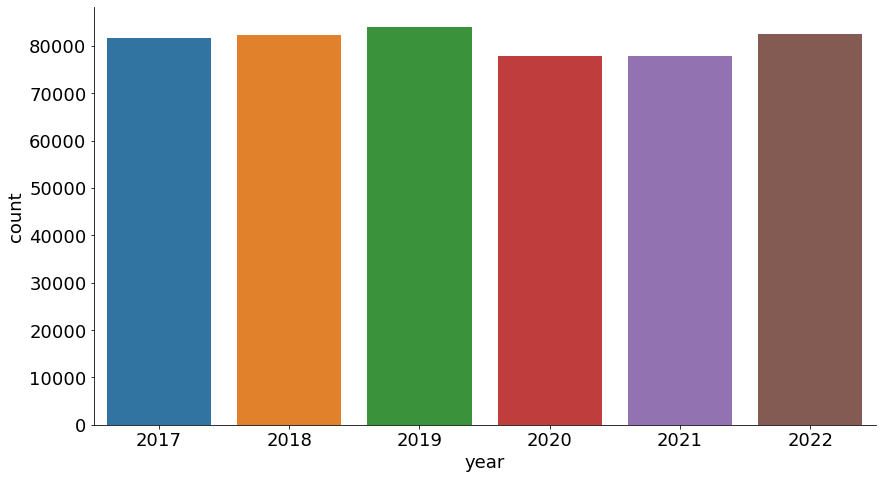

In [12]:
sns.catplot(data=detroit_df, x = 'year', kind = 'count', height=7, aspect = 1.8)

<font size = '3'>We can see that the total reported crime incidents were consistent over the six years. Now let's look at the total incident over six years by zip code. </font> <br>

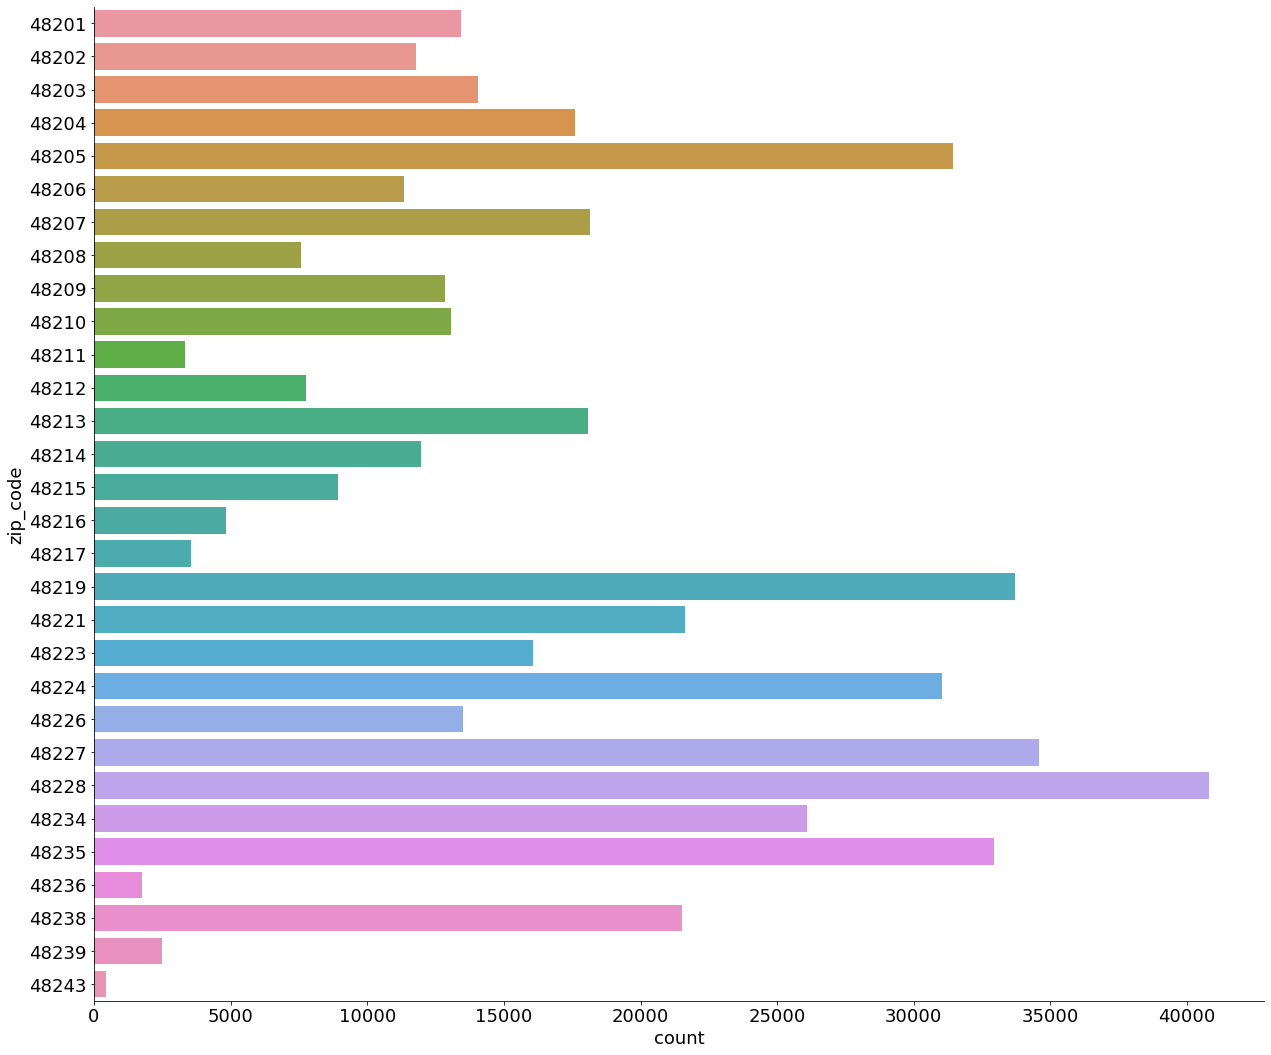

In [13]:
sns.catplot(data=detroit_df, y = 'zip_code', kind = 'count', height=15, aspect = 1.2)

<font size='3'> The total criminal incident reported is higher in the 48228 zip code, which is a residencial Western part of Detroit. The least reported incidents are in the 48243 zip code which is a Downtown business area. Now let's look at the statistics based on neighborhood. </font> <br><br>

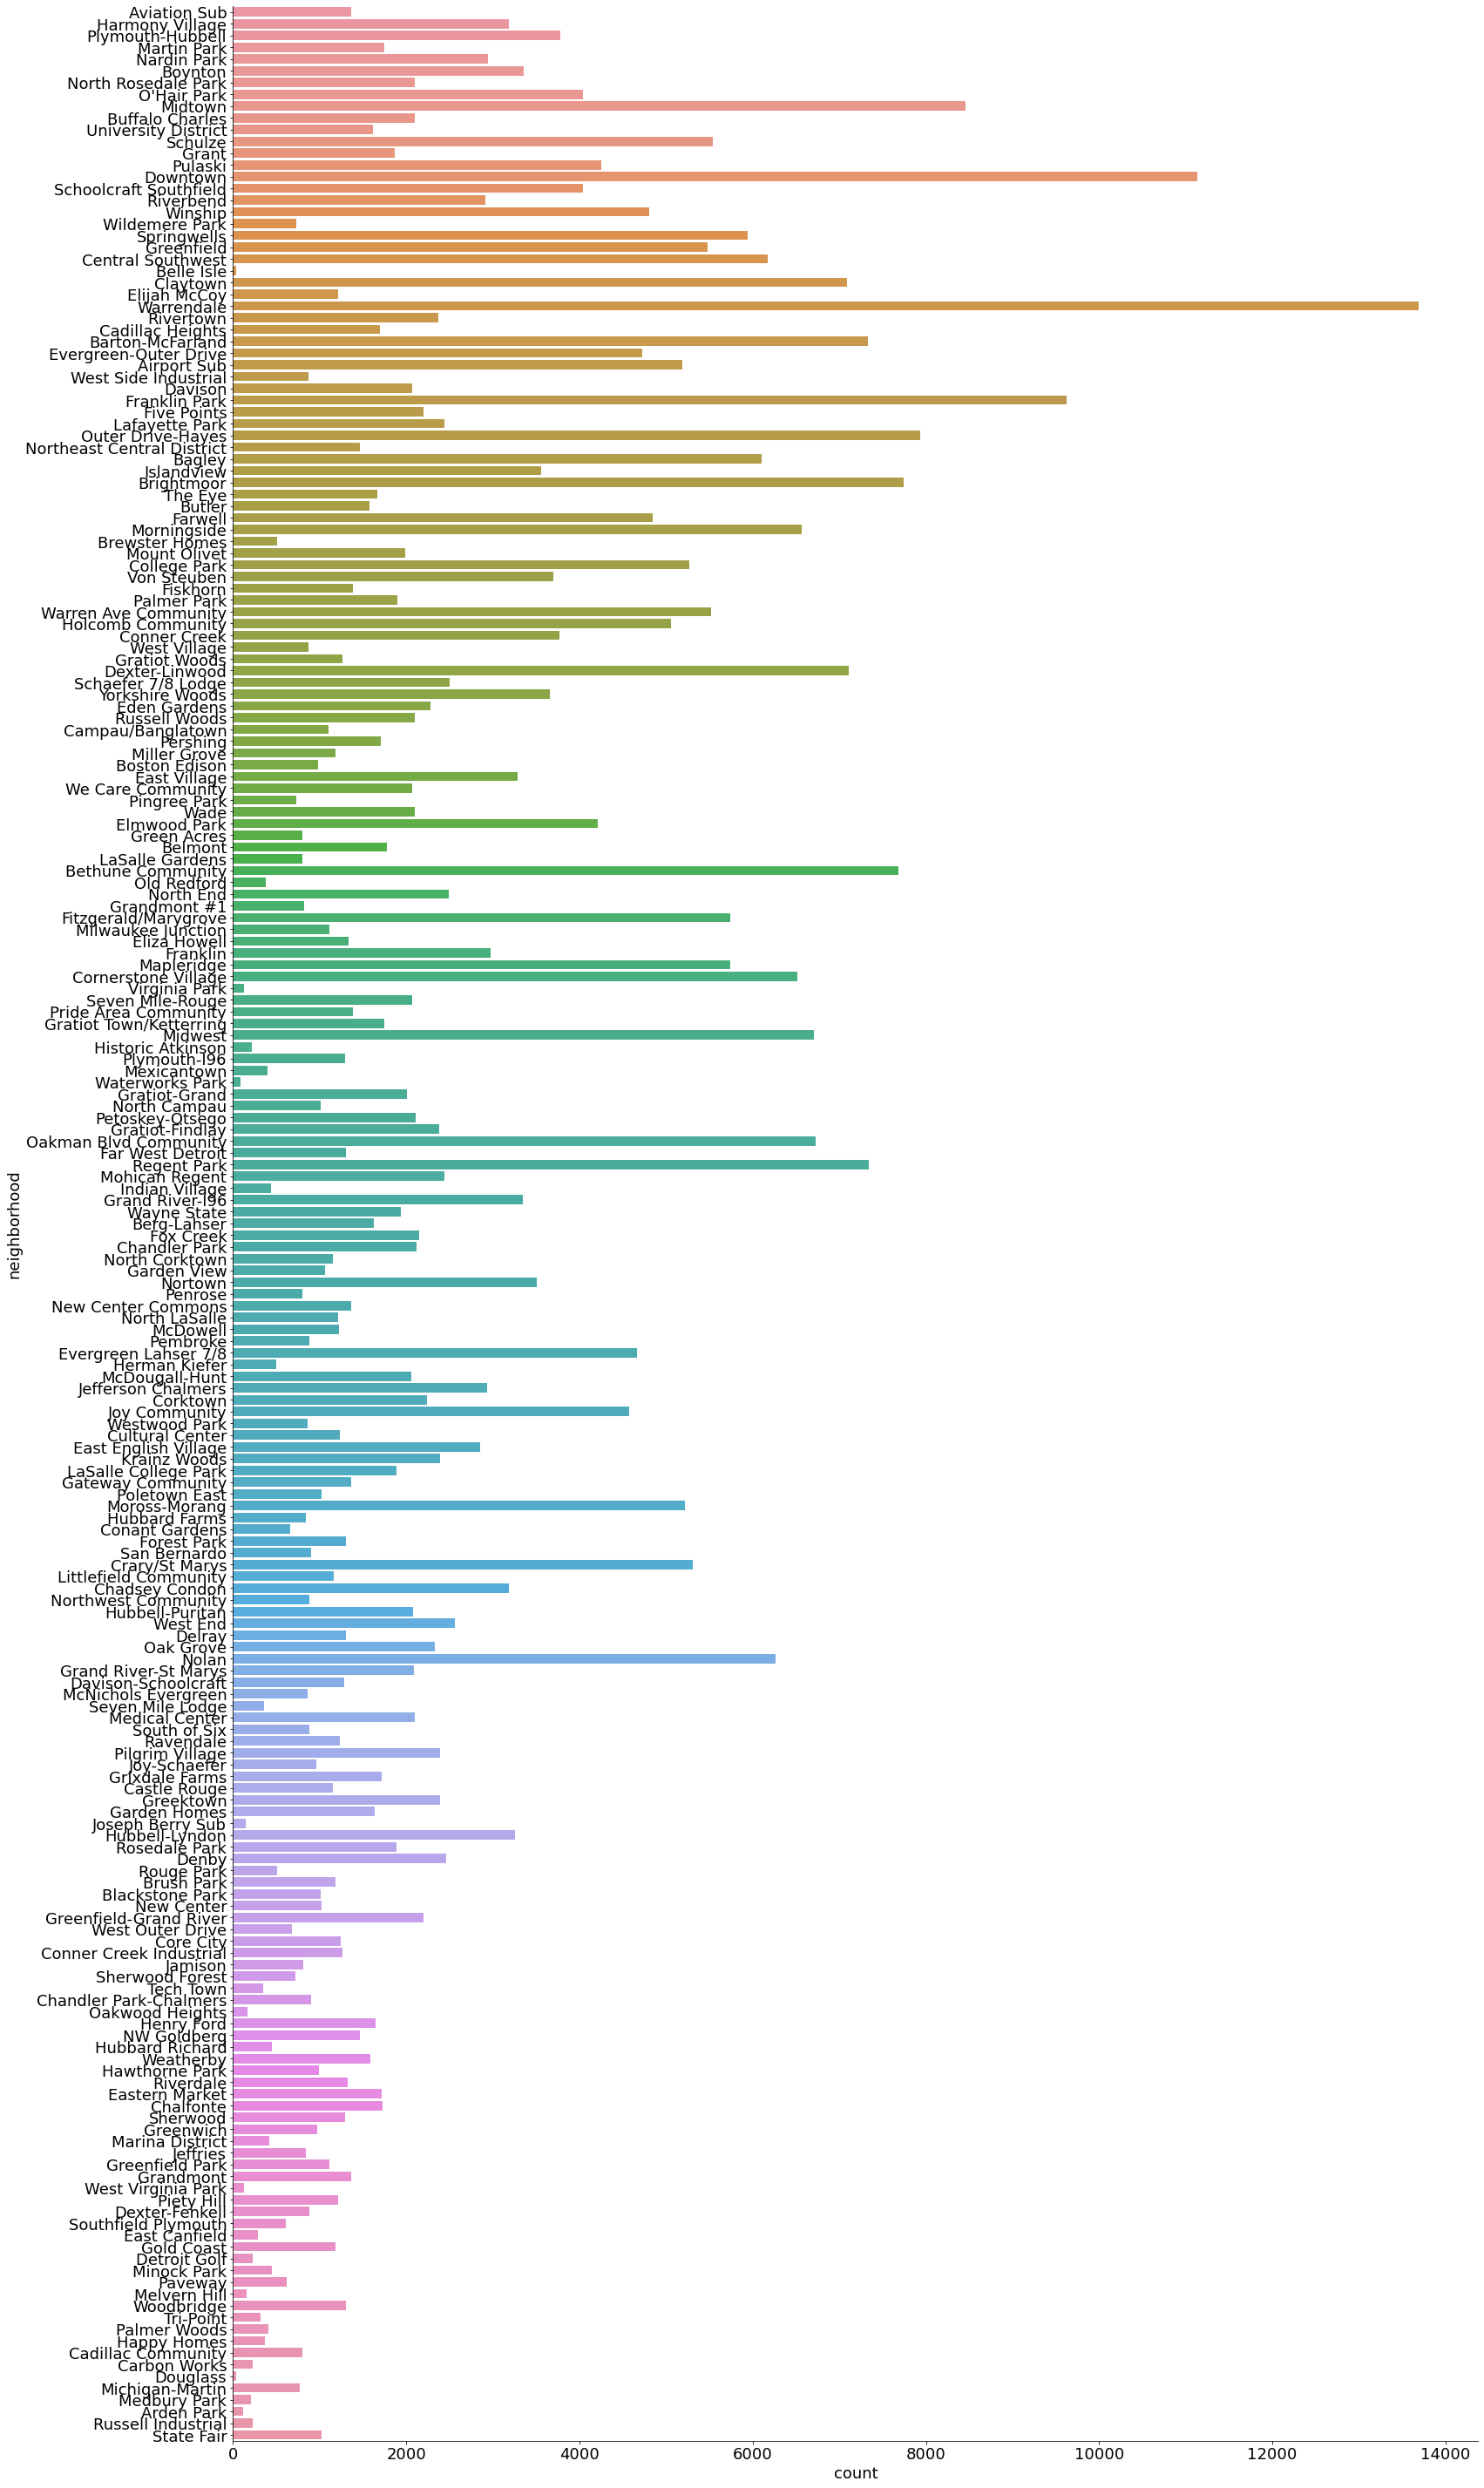

In [14]:
sns.catplot(data=detroit_df, y = 'neighborhood', kind = 'count', height=40, aspect = 0.6)

<font size='3'> The Warrendale neighborhood, which is located in the 48228 zipcode, reported the highest crime incidents while the Douglass and Belle Isle, both located in midtown, reported the least incidents. We can't necessarily learn which area is more dangerous from this since there are 30 offense types and we need to break them down and see the degrees of seriousness of those crimes. First let's look at what the offenses are. </font> <br><br>

In [15]:
pd.unique(detroit_df['offense_category'])

<StringArray>
[               'ROBBERY',                  'ARSON',     'DAMAGE TO PROPERTY',
         'FAMILY OFFENSE',                'LARCENY',                  'OTHER',
                  'FRAUD',               'BURGLARY',                'RUNAWAY',
                   'OUIL',         'STOLEN VEHICLE',        'STOLEN PROPERTY',
                'ASSAULT',              'EXTORTION',          'MISCELLANEOUS',
     'AGGRAVATED ASSAULT',             'KIDNAPPING',       'WEAPONS OFFENSES',
               'HOMICIDE',                'FORGERY',        'DANGEROUS DRUGS',
         'SEXUAL ASSAULT',           'SEX OFFENSES',                 'LIQUOR',
     'DISORDERLY CONDUCT',           'SOLICITATION',  'OBSTRUCTING JUDICIARY',
 'OBSTRUCTING THE POLICE',   'JUSTIFIABLE HOMICIDE',               'GAMBLING']
Length: 30, dtype: string

<font size='3'> Let's select very serious offenses such as Robbery, Arson, aggravated assault, kidnapping, weapons offenses, Homicide, sex offenses, and  Justifiable Homicide. </font> <br><br>

In [16]:
serious_offenses = ['ROBBERY','ARSON', 'AGGRAVATED ASSAULT', 'WEAPONS OFFENSES', 'HOMICIDE', 'SEX OFFENSES', 'JUSTIFIABLE HOMICIDE']
serious_offenses_df = detroit_df.loc[detroit_df['offense_category'].isin(serious_offenses)]

In [17]:
serious_offenses_df.head(10)

,offense_category,day_of_week,hour_of_day,year,neighborhood,zip_code
1,ROBBERY,2.0,0.0,2017,Aviation Sub,48204
2,ARSON,1.0,9.0,2017,Harmony Village,48235
3,ARSON,7.0,4.0,2017,Plymouth-Hubbell,48227
6,ARSON,4.0,9.0,2017,Boynton,48217
8,ROBBERY,6.0,7.0,2017,O'Hair Park,48219
9,ARSON,2.0,3.0,2017,Midtown,48201
10,ROBBERY,1.0,2.0,2017,Buffalo Charles,48212
12,ROBBERY,2.0,4.0,2017,Schulze,48221
15,ARSON,4.0,9.0,2017,Pulaski,48205
17,ROBBERY,3.0,16.0,2017,Schoolcraft Southfield,48227


<font size='3'>Now let's examine what the total reported incident looks like for each year for each offense category. </font> <br><br>

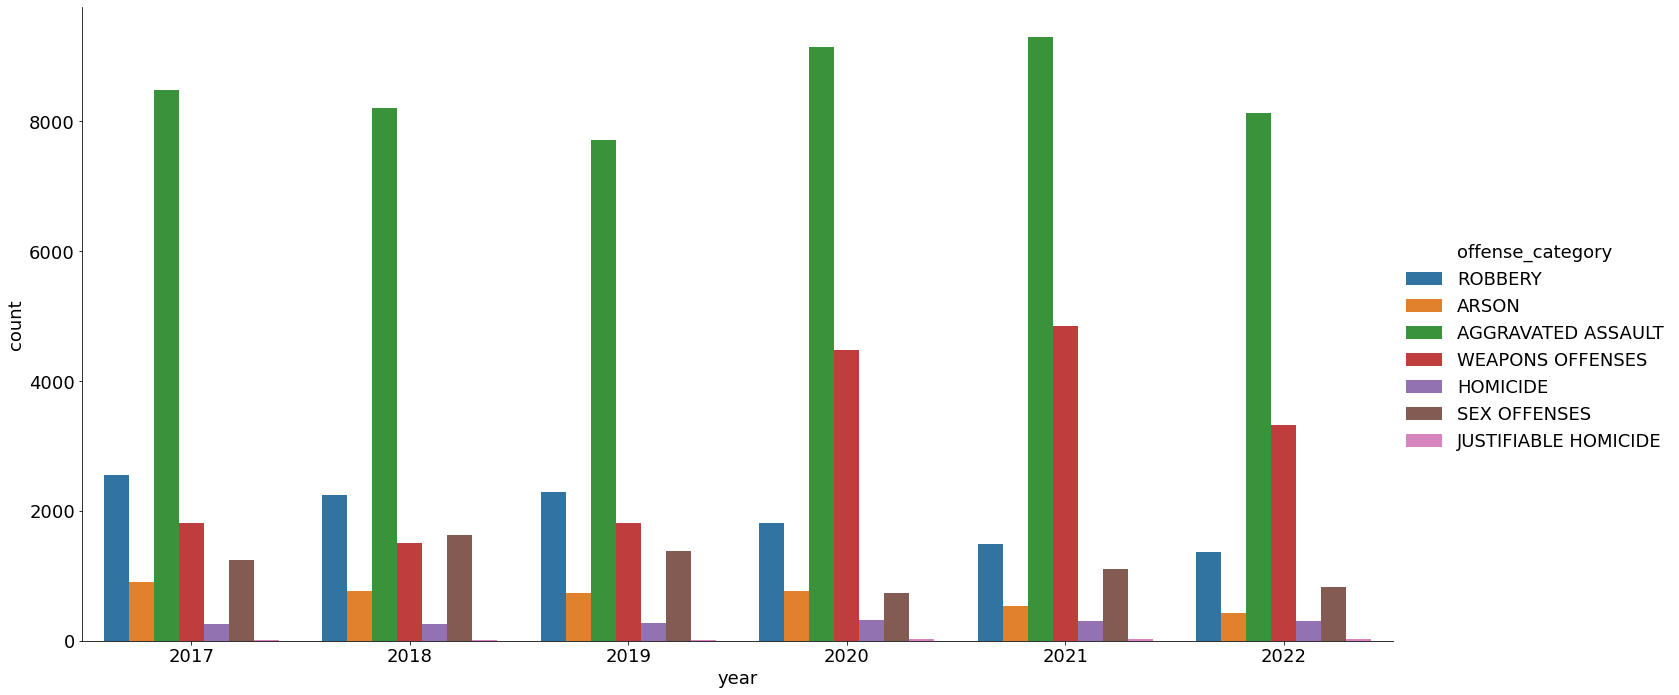

In [18]:
sns.catplot(data=serious_offenses_df, x = 'year', kind = 'count', height=10, aspect = 2, hue='offense_category')

<font size = '3'> Interestingly, aggravated assult is the most reported category of offenses for all the six years and it appears to be fairly consistent. Justifiable homicide and homicide are the least reported offenses for all six years. The second most reported offense is Robbery for the first three years and weapons offenses for th remaining three years. Now let's visualize the statistics based on zipcode and neighborhood </font> <br><br>

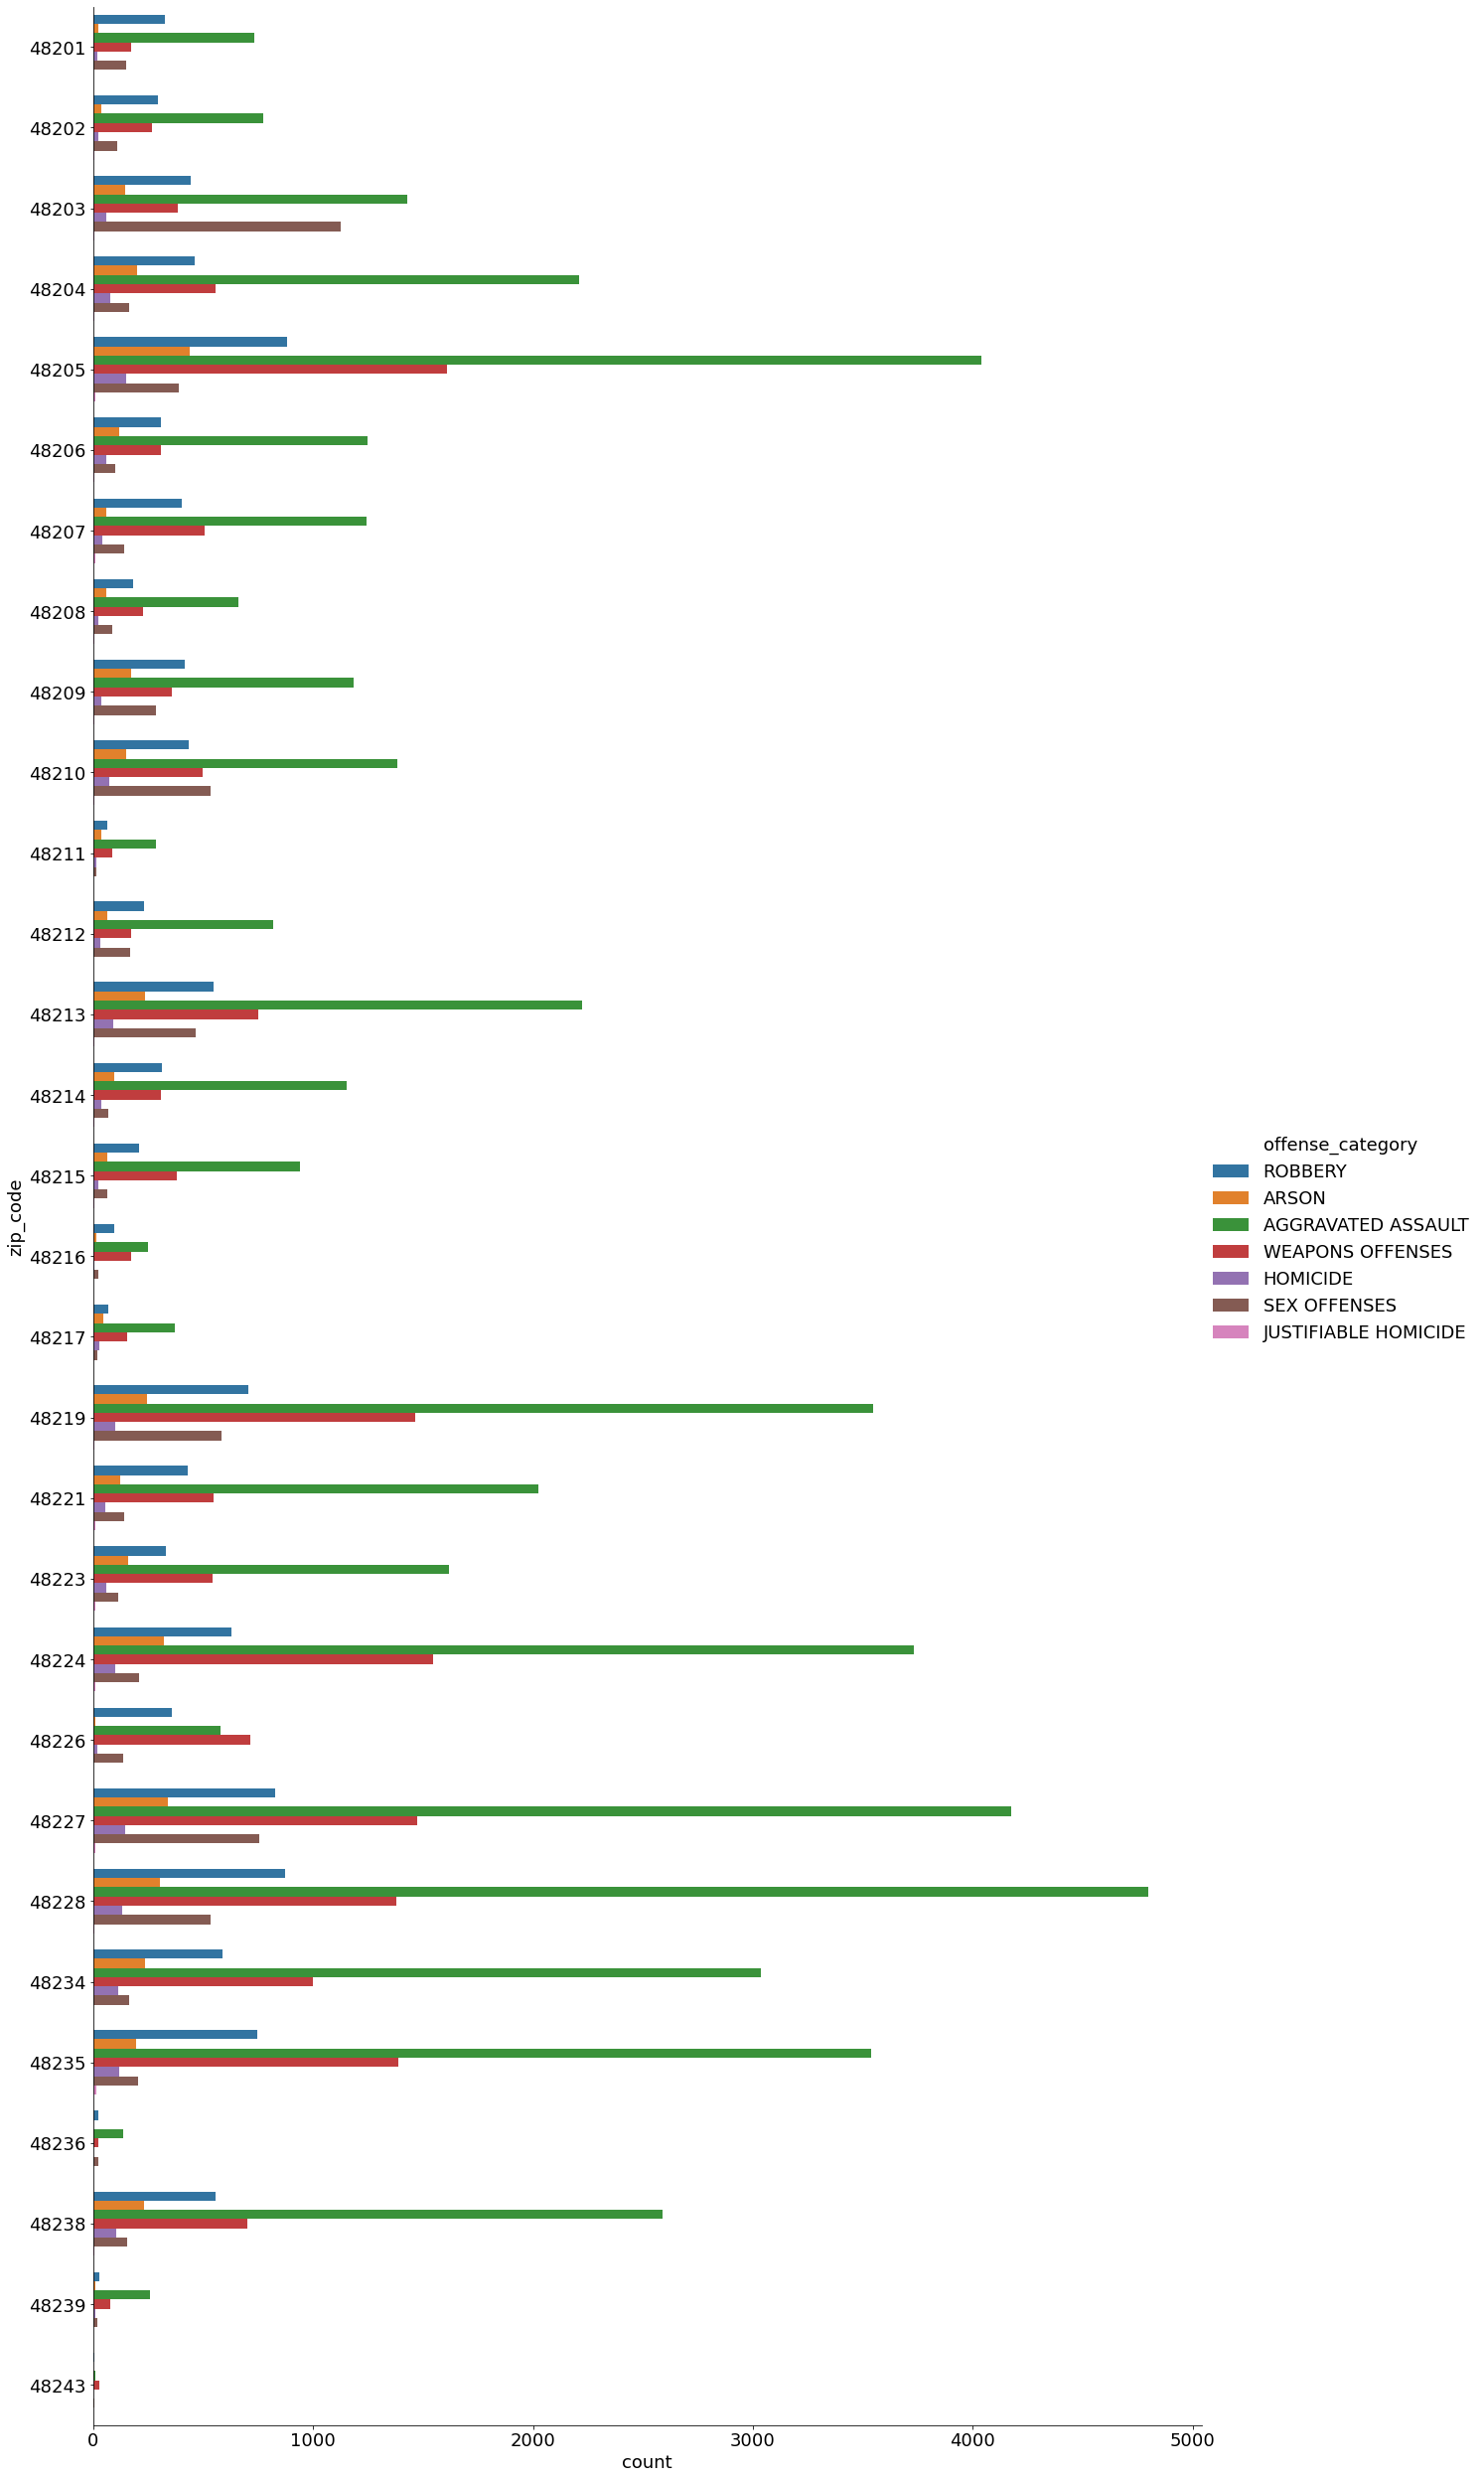

In [19]:
sns.catplot(data=serious_offenses_df, y = 'zip_code', kind = 'count', height=35, aspect = 0.5, hue='offense_category')

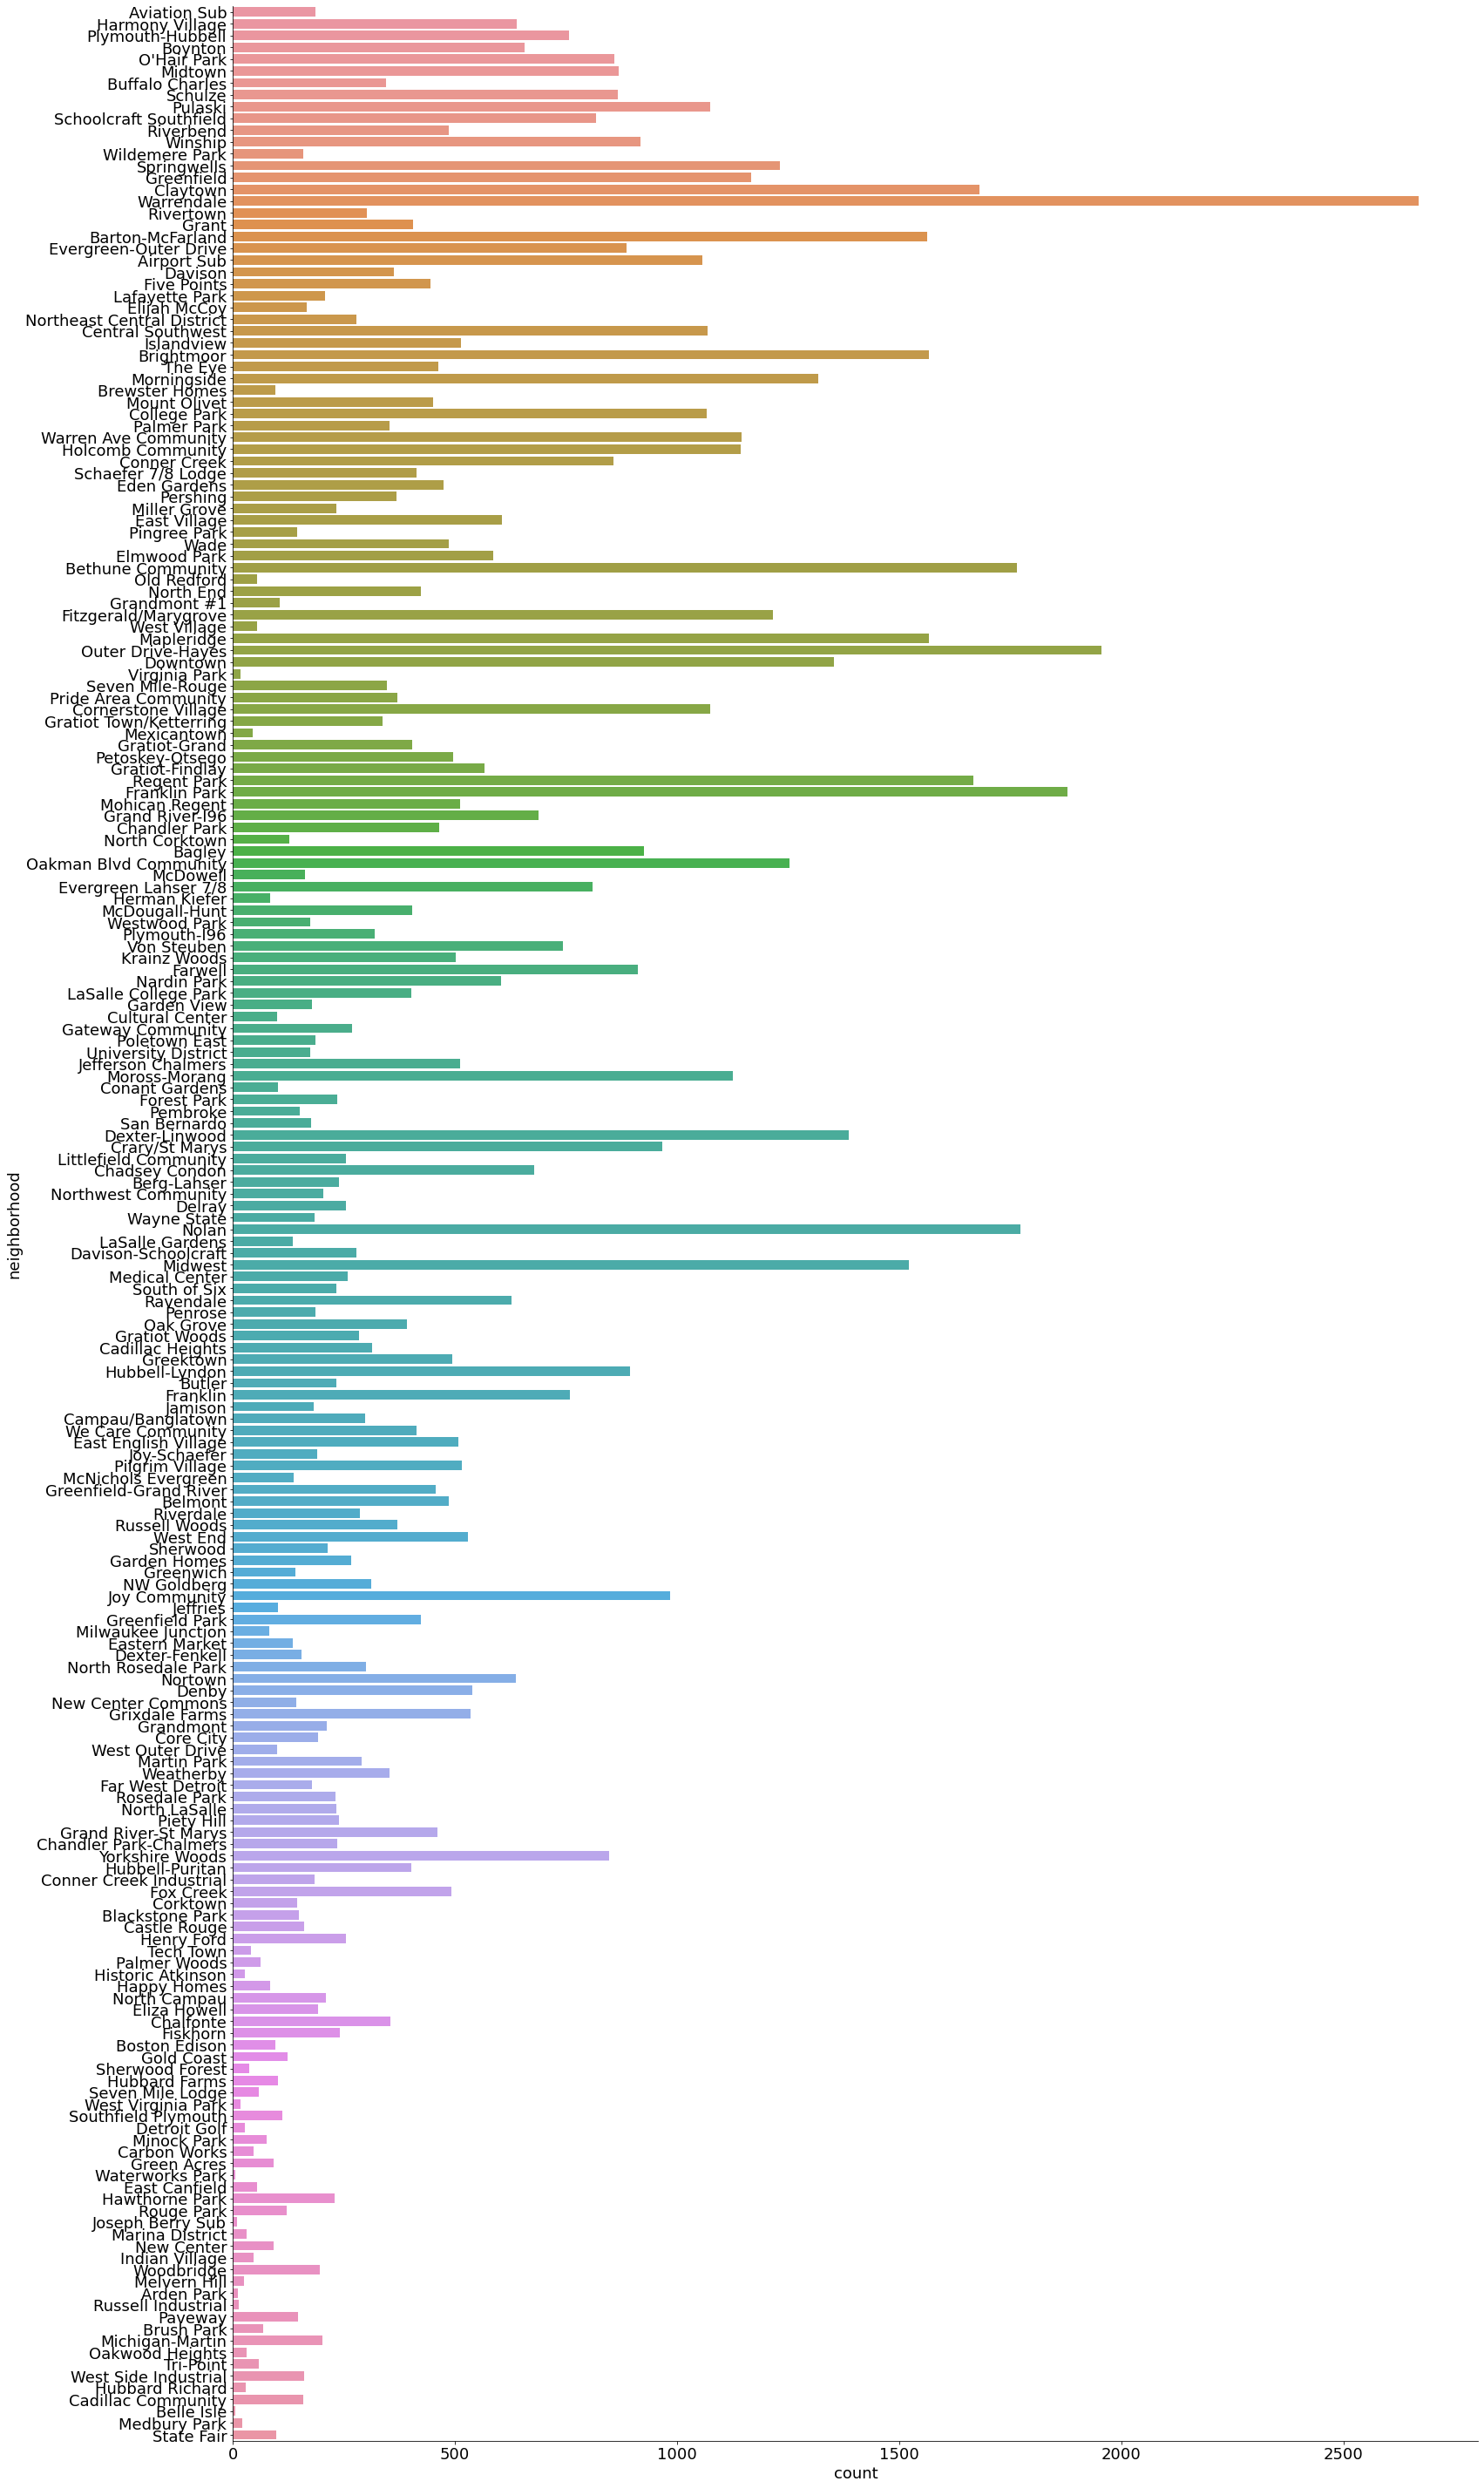

In [20]:
sns.catplot(data=serious_offenses_df, y = 'neighborhood', kind = 'count', height=40, aspect = 0.6)

<font size='3'>Aggravated assault is the most reported category of offense in all zip codes and robbery and weapons offenses are the second most reported offenses. 48228 and 48243 are where the most and least offenses were reported repectively  </font> <br><br>

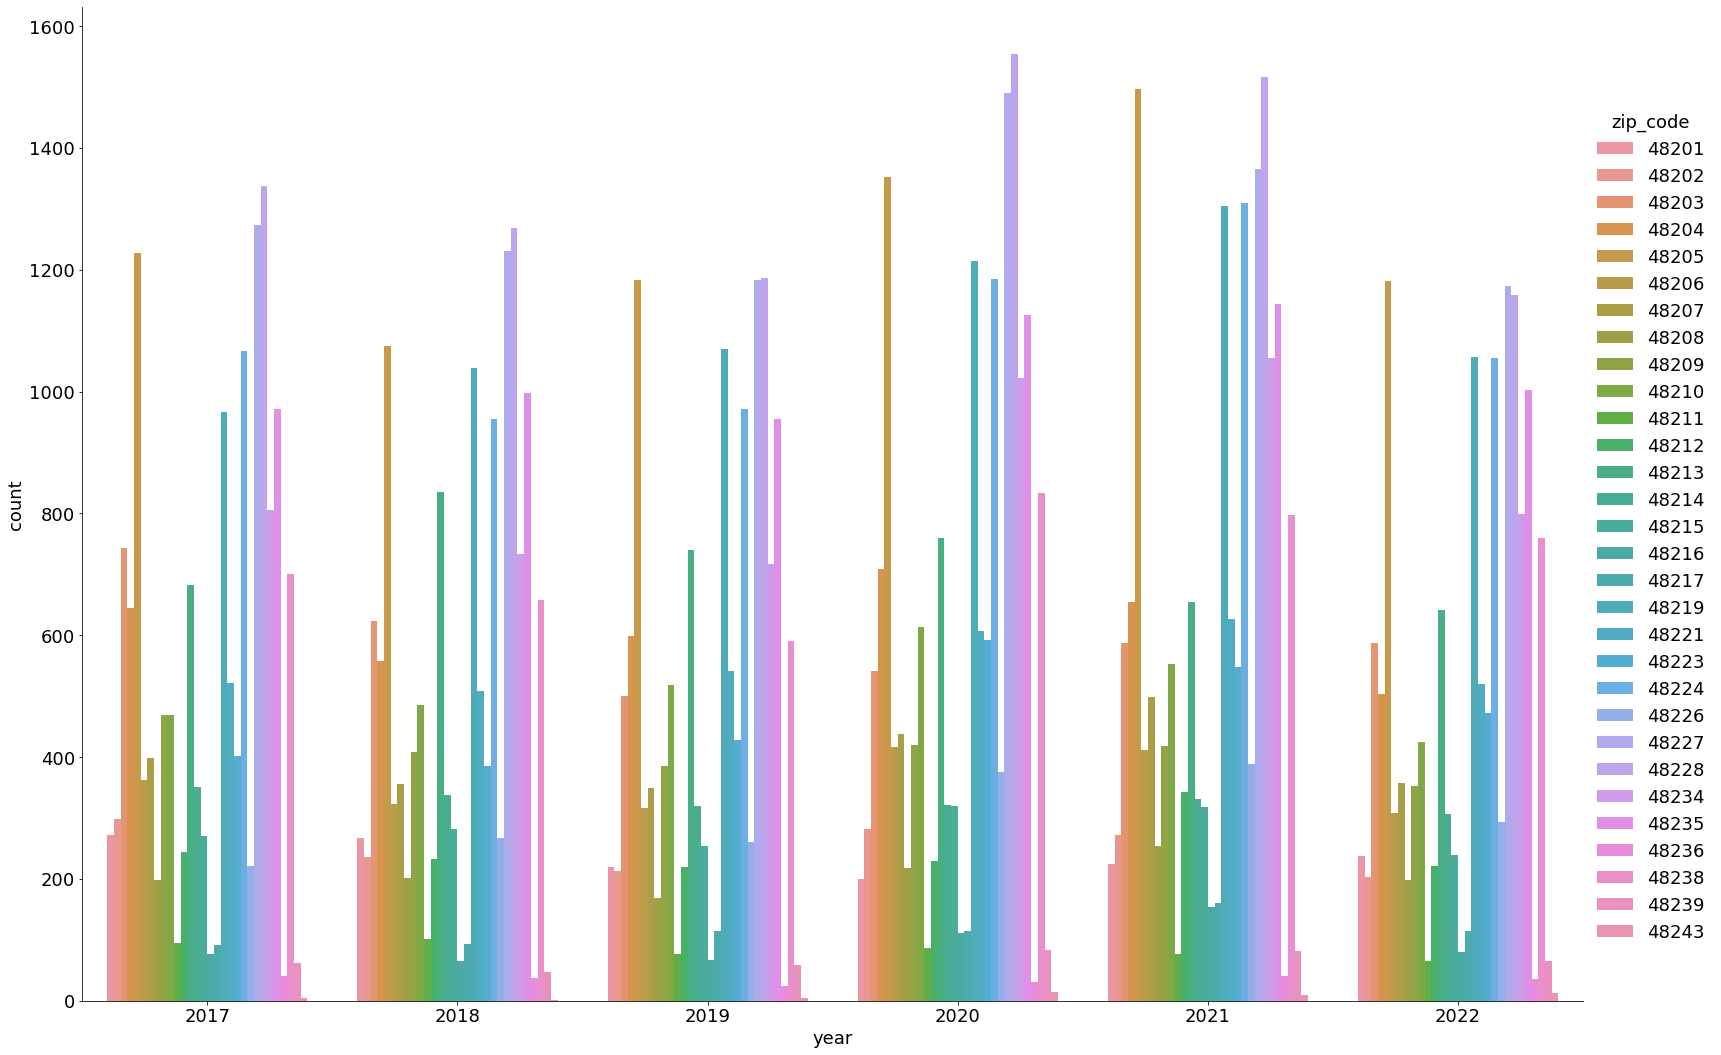

In [21]:
sns.catplot(data=serious_offenses_df, x = 'year', kind = 'count', height=15, aspect = 1.5, hue='zip_code')

<font size='3'>Now let's look at the three most reported incidents and examine how it varies with day of week and time of day. </font><br><br>

In [22]:
three_most_reported = ['ROBBERY', 'AGGRAVATED ASSAULT', 'WEAPONS OFFENSES']
three_most_reported_df = serious_offenses_df.loc[serious_offenses_df['offense_category'].isin(three_most_reported)]

In [23]:
three_most_reported_df.head(20)

,offense_category,day_of_week,hour_of_day,year,neighborhood,zip_code
1,ROBBERY,2.0,0.0,2017,Aviation Sub,48204
8,ROBBERY,6.0,7.0,2017,O'Hair Park,48219
10,ROBBERY,1.0,2.0,2017,Buffalo Charles,48212
12,ROBBERY,2.0,4.0,2017,Schulze,48221
17,ROBBERY,3.0,16.0,2017,Schoolcraft Southfield,48227
18,ROBBERY,7.0,9.0,2017,Riverbend,48215
19,ROBBERY,5.0,5.0,2017,Winship,48235
22,ROBBERY,2.0,5.0,2017,Greenfield,48235
25,ROBBERY,1.0,4.0,2017,Claytown,48210
28,ROBBERY,4.0,8.0,2017,Rivertown,48207


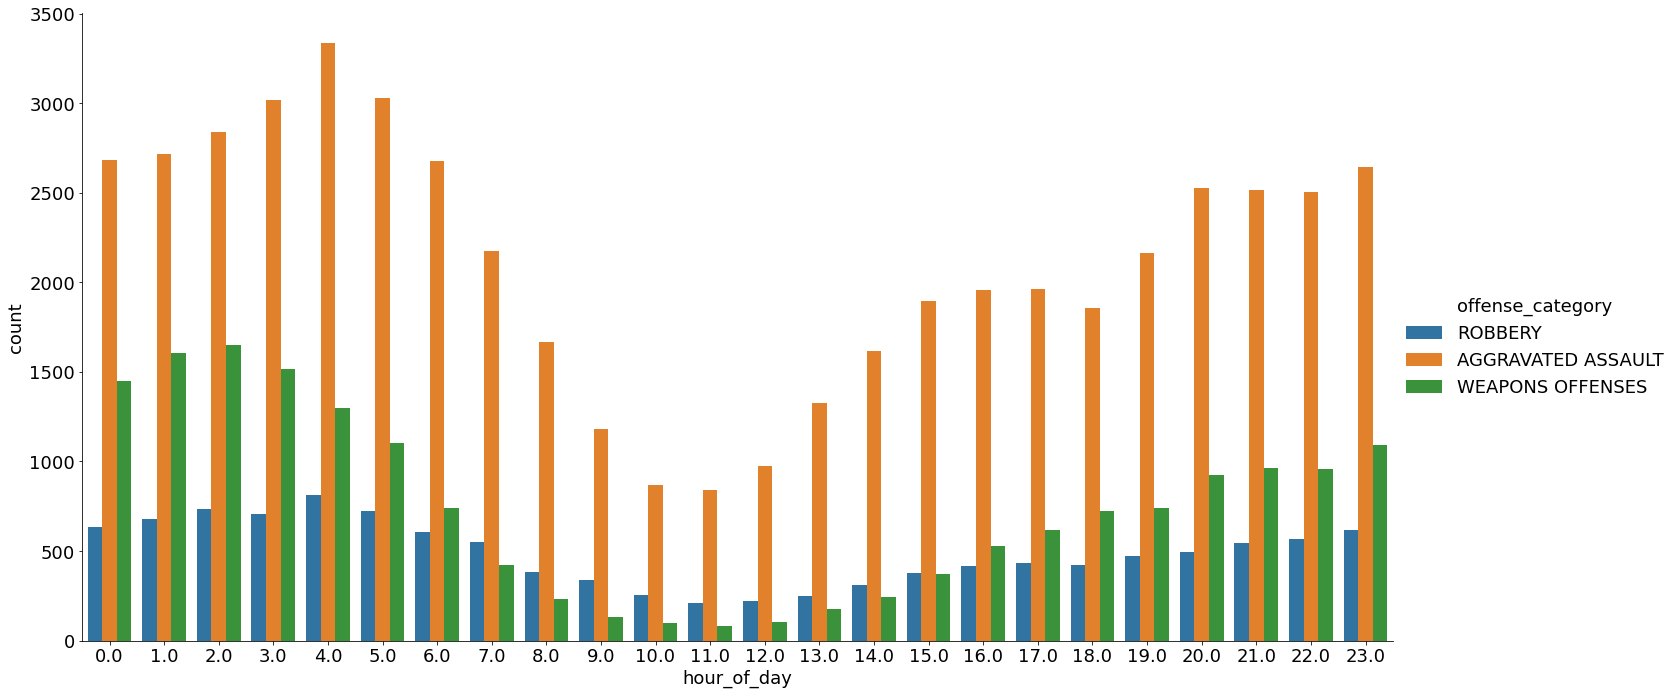

In [24]:
sns.catplot(data=three_most_reported_df, x = 'hour_of_day', kind = 'count', height=10, aspect = 2, hue='offense_category')

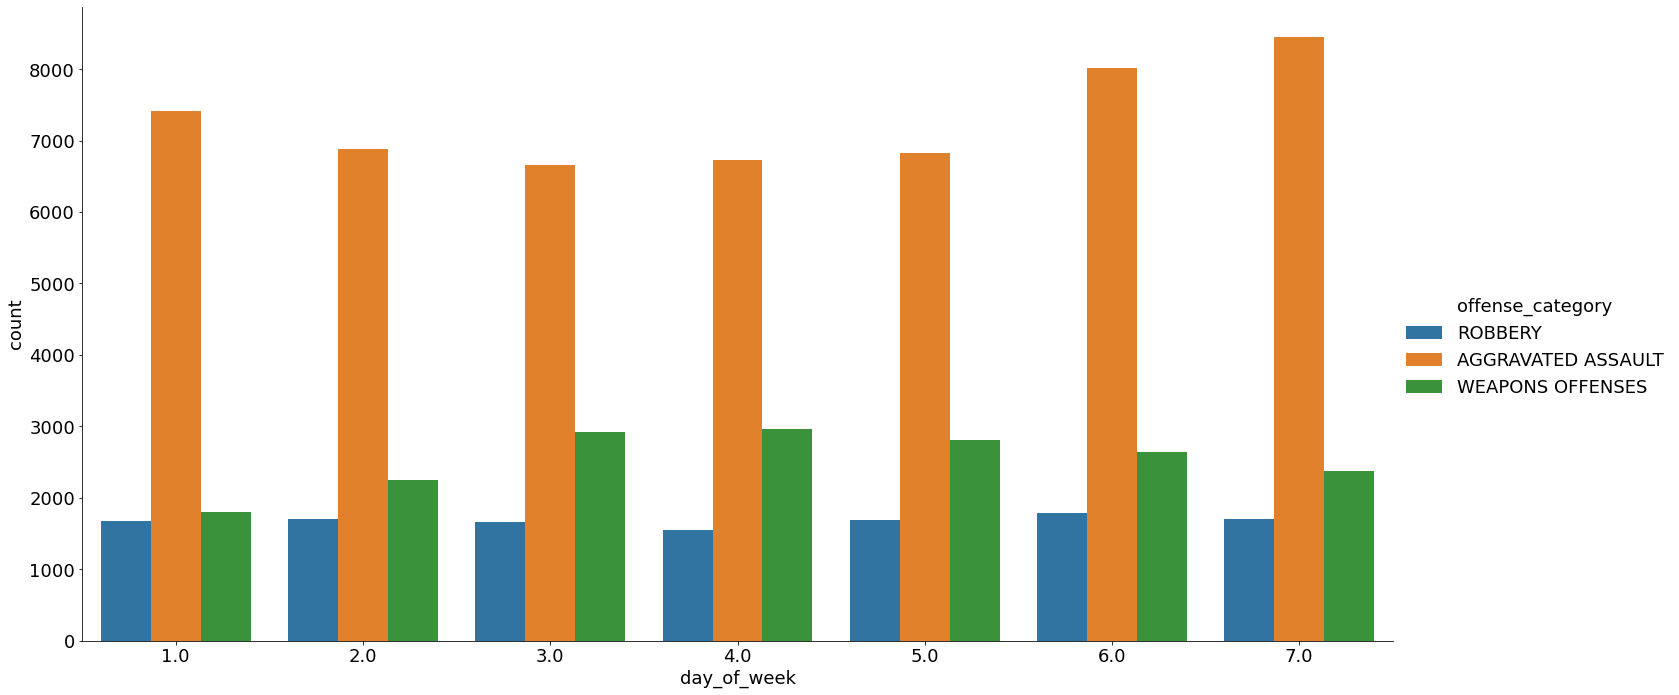

In [25]:
sns.catplot(data=three_most_reported_df, x = 'day_of_week', kind = 'count', height=10, aspect = 2, hue='offense_category')

<font size='3'> All crimes tend to incread during the evening and late nights. There is a small difference in the frequency of crime in the days of the week. There is a slight increase on weekends. Finally, we will look at the two homicide related offenses, homicide and justifiable homicide.</font> <br><br>

In [26]:
homicide_offenses = ['HOMICIDE', 'JUSTIFIABLE HOMICIDE']
homicide_offenses_df = serious_offenses_df.loc[serious_offenses_df['offense_category'].isin(homicide_offenses)]

In [27]:
homicide_offenses_df.head()

,offense_category,day_of_week,hour_of_day,year,neighborhood,zip_code
1733,HOMICIDE,7.0,9.0,2017,Warrendale,48228
2050,HOMICIDE,5.0,22.0,2017,Pulaski,48205
2132,HOMICIDE,1.0,2.0,2017,Nolan,48203
2761,HOMICIDE,7.0,4.0,2017,Warrendale,48228
2775,HOMICIDE,7.0,18.0,2017,Elmwood Park,48207


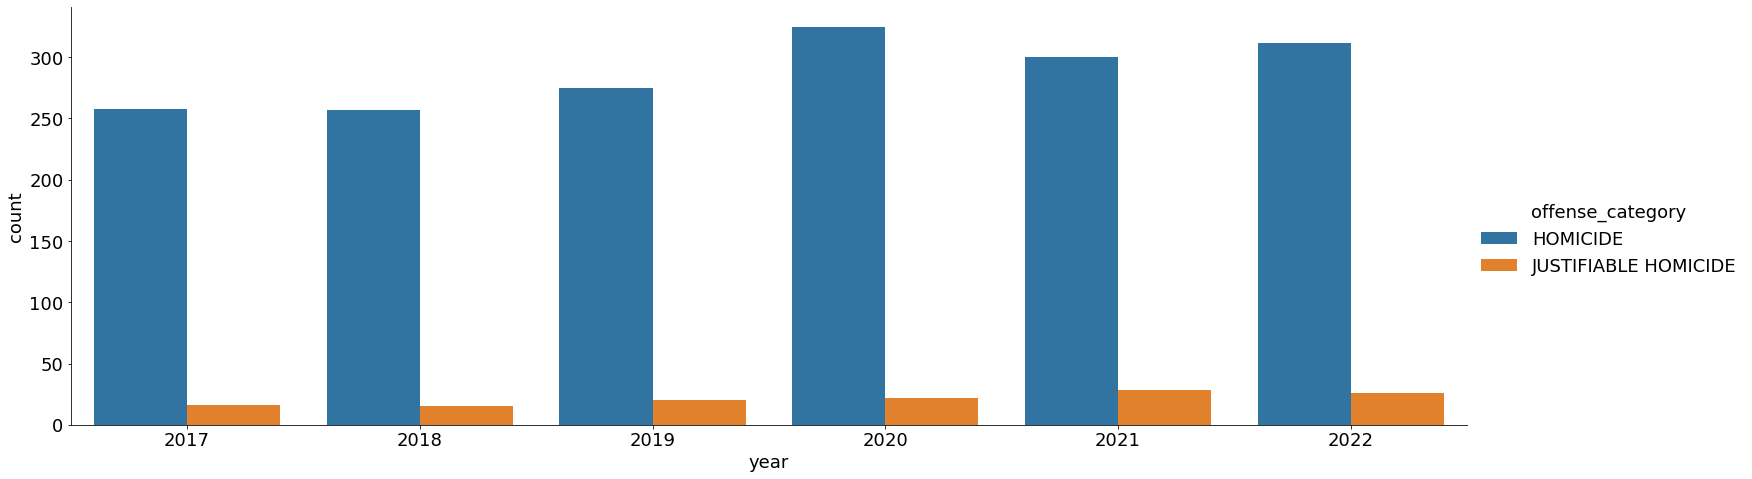

In [28]:
sns.catplot(data=homicide_offenses_df, x = 'year', kind = 'count', height=7, aspect = 3, hue='offense_category')

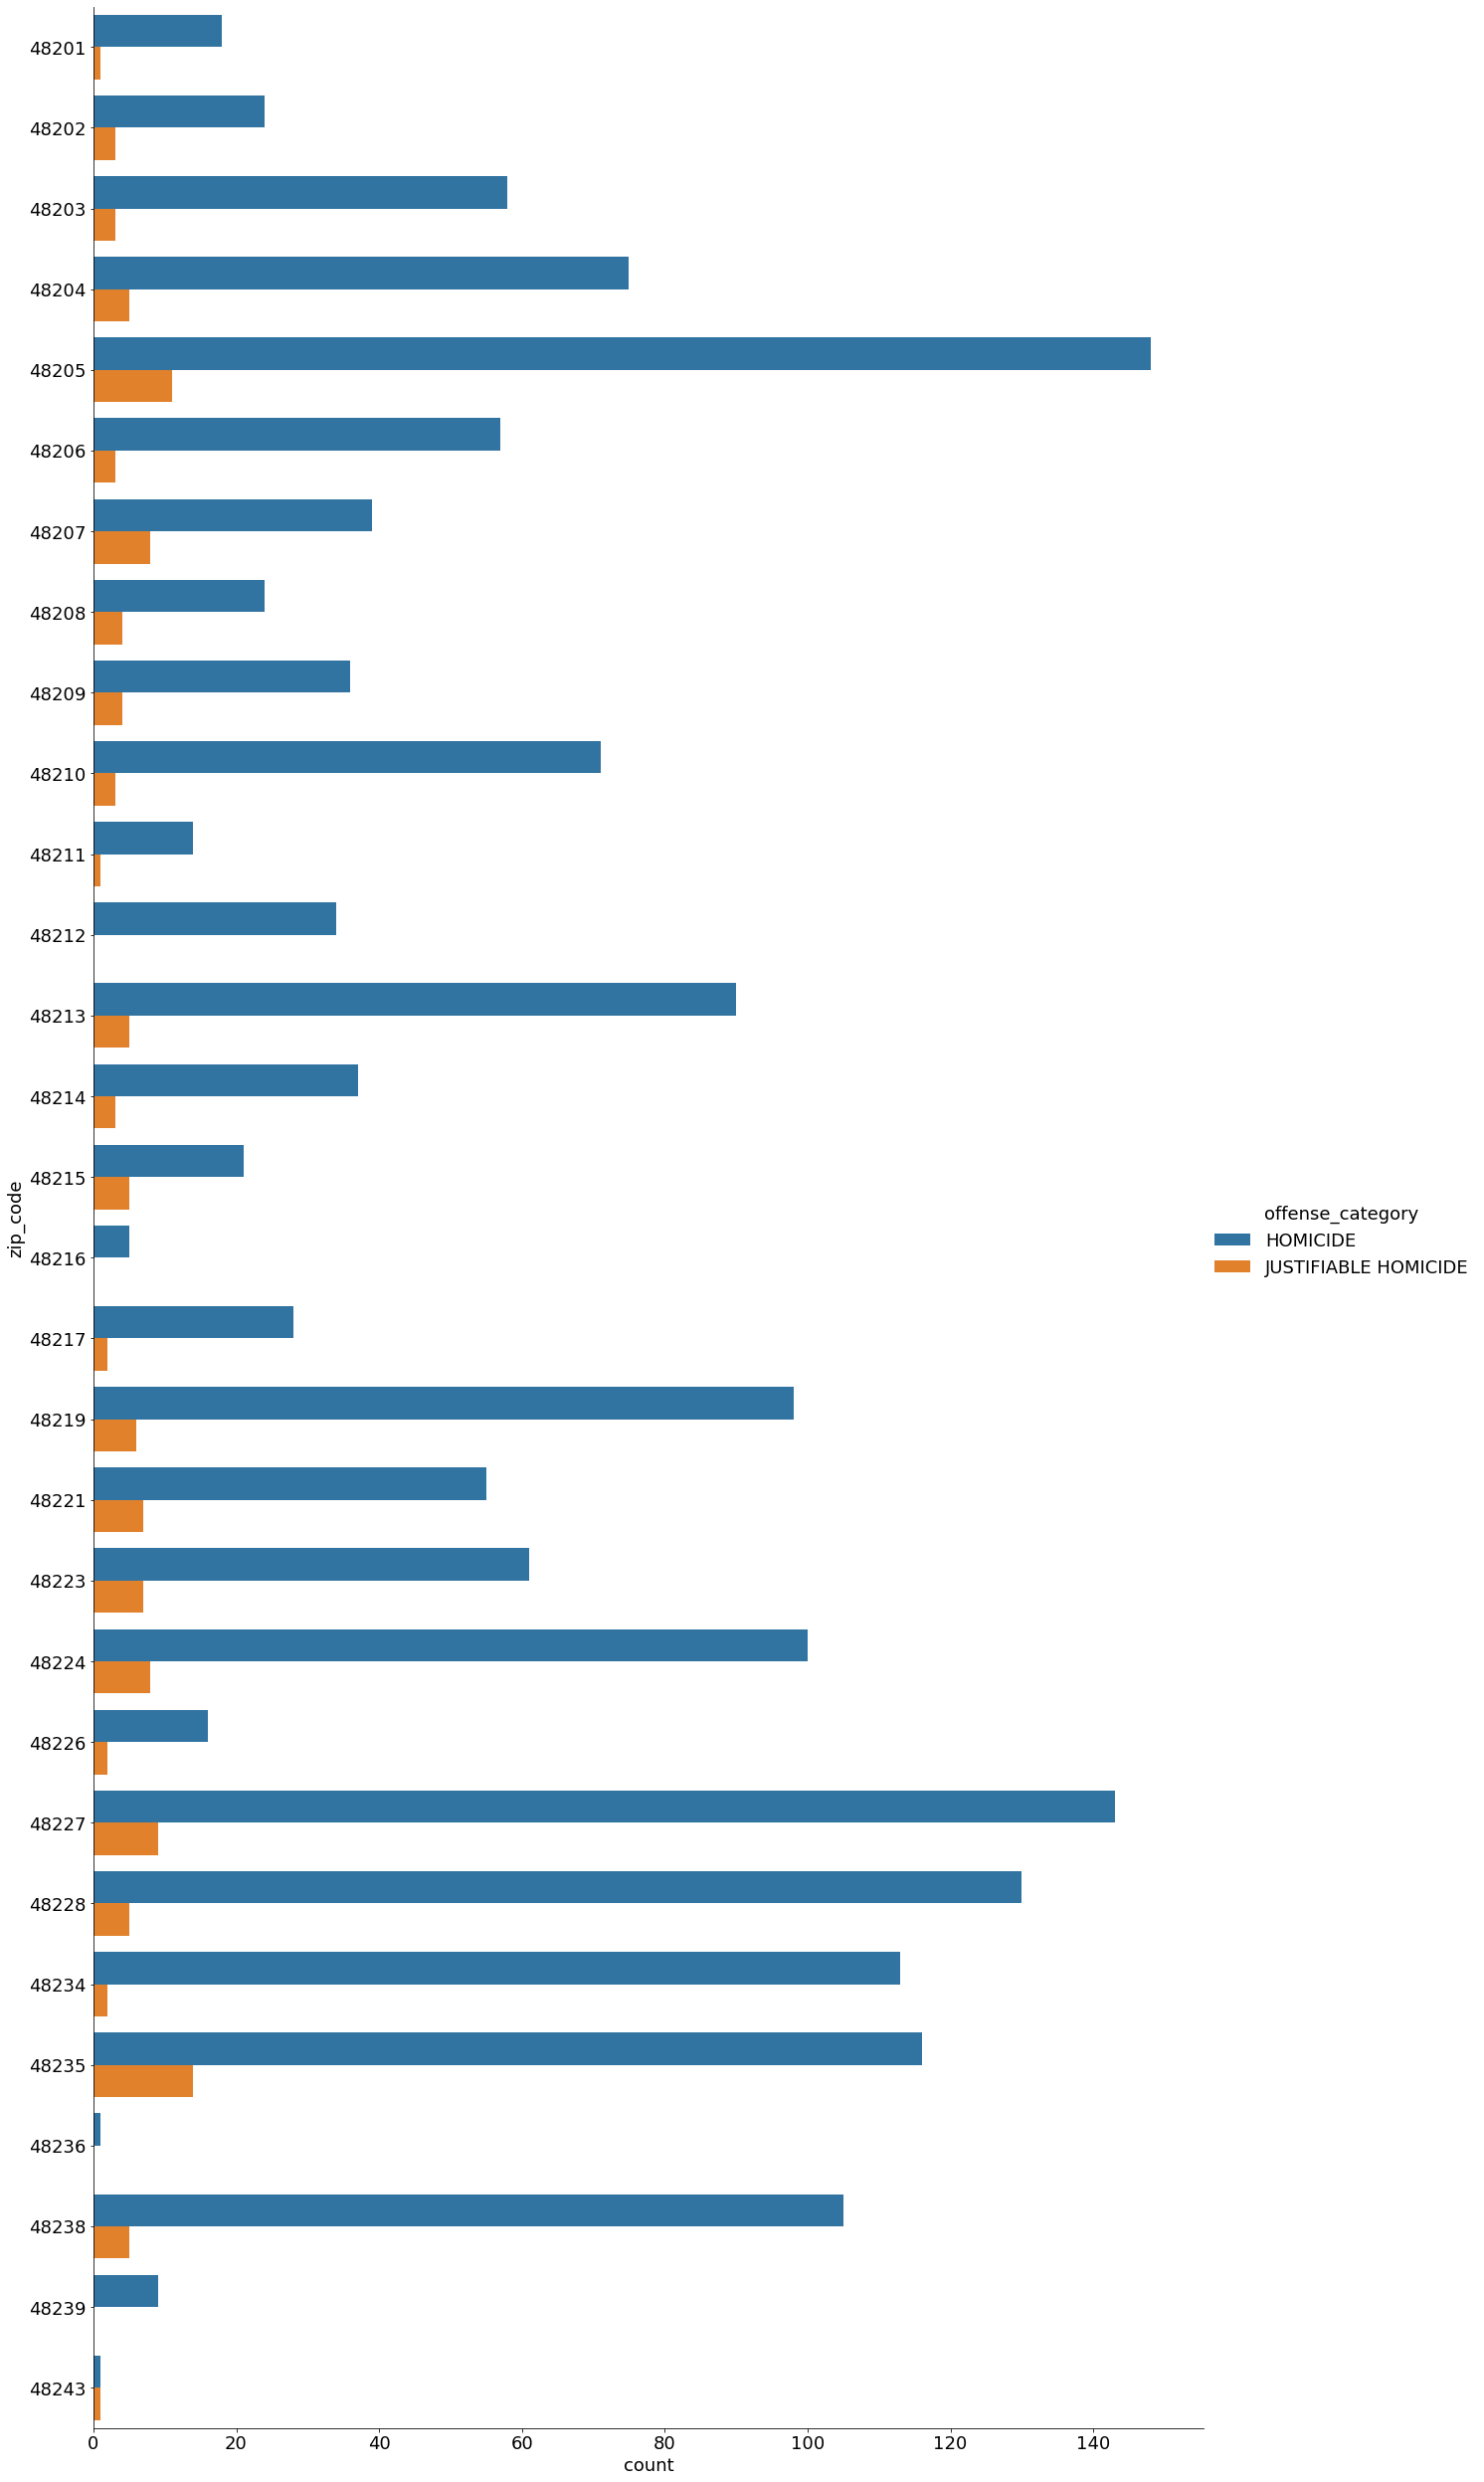

In [29]:
sns.catplot(data=homicide_offenses_df, y = 'zip_code', kind = 'count', height=35, aspect = 0.5, hue='offense_category')

<font size='3'>Zip codes 48205 and 48227 are the two areas where most of the homicide offense reported from for the past five years. </font><br><br>